In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
np.set_printoptions(edgeitems=10)

In [2]:
data = pd.read_csv("data/dataset_1.csv",index_col=0)
data

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561
...,...,...
995,-5.060165,2.482045
996,-5.079404,2.773580
997,-5.861520,3.068426
998,-5.018934,3.110904


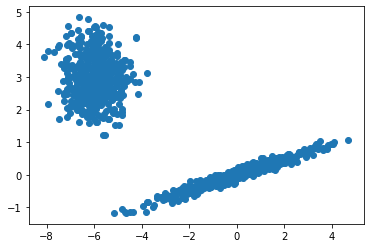

In [3]:
plt.scatter(data["normalized_age"], data["normalized_salary"])

In [4]:
def determine_C_movement(decimals):
    a = np.round(centroid_positions, decimals)
    b = np.round(for_comparison, decimals)   
    return np.array_equal(a, b)

# determine_C_movement(3)

def measure_distances():
#     from numpy import linalg as LA
    
    for idx_centroid in range(k):
        
#         for idx_row in range(data.shape[0]):
#             point = data[idx_row,:]

        if metric == "l2":
            # calcualte Euclidean d
            dist = np.power(np.sum((data - centroid_positions[idx_centroid,:])**k, axis=1), 1/k)
            distances_array[:,idx_centroid] = dist
            
        else :
            # calculate Manhatan d
            print("Métrique manhattan non prise en charge. Veuillez choisir : metric = 'l2'")
                          
    return distances_array
        
# measure_distances()   

def calculate_new_positions():
    
    for idx_centroid in range(k):
        kth_subset = data[centroid_labels == idx_centroid]
        centroid_positions[idx_centroid,:] = scipy.ndimage.center_of_mass(kth_subset)
        
    return centroid_positions

# calculate_new_positions()

In [5]:
# Structure :

k = 2
scaler="StandardScaler"
metric="l2"
decimals=3

# def KMeans_scratch(data, k, scaler="StandardScaler", metric="l2", decimals=3):    
    
# option standard scaler
if scaler == "StandardScaler" :
    from sklearn.preprocessing import StandardScaler
    data = StandardScaler().fit_transform(data)
else:
    print ("'Non-scaled' non pris en charge. Veuillez choisir : scaler='StandardScaler'")

# initial cluster positions = 2 first points of data
centroid_positions = np.vstack([data[k,:] for k in range(k)])
for_comparison = np.vstack([data[k,:] for k in range(k)])

# create cluster's new positions array
# centroid_positions_new = np.empty((k, data.shape[1]))

# initial distances = 0
distances_array = np.zeros((data.shape[0], k))

# initial movement
C_static = False 

count = 0    

while C_static == False:
    for_comparison = centroid_positions

    # Calcul des distances : OK     
    distances_array = measure_distances() 

    # Labeliser les points : OK
    centroid_labels = np.argmin(measure_distances(), axis=1)
    print(for_comparison)

    # calculer les positions des barycentres = nouveaux centroïdes : OK
    centroid_positions = calculate_new_positions()
    print(centroid_positions)
    print(for_comparison)
    
    # update C_movement variable : -----
    C_static = determine_C_movement(decimals)

    count += 1

# print(centroid_positions)
# print(np.bincount(centroid_labels))
# print(count)

#     return centroid_positions_new, centroid_labels, count
    
# KMeans_scratch(data, 2, scaler="StandardScaler", metric="l2", decimals=3)

[[ 1.13979705 -0.94534292]
 [ 2.10534395 -0.43738712]]
[[191.3688366   -0.38208563]
 [ 26.89832873  -0.38208563]]
[[191.3688366   -0.38208563]
 [ 26.89832873  -0.38208563]]


In [6]:
np.vstack([data[k,:] for k in range(k)])

array([[ 1.13979705, -0.94534292],
       [ 2.10534395, -0.43738712]])